# Build Environment (Local)

In [ ]:
import numpy as np

class build_environment(object):

  def __init__(self, K, threshold, T, trials):
    self.K = K + 1
    self.mu = None
    self.mu_t = None
    self.threshold = threshold
    self.true_epsilon_arms = []
    self.T = T
    self.trials = trials
    self.G = None
    self.sig = 1.0
    self.safe_arm = None

    self.baseline = self.K - 1


    
    
    self.best_arm = None

  def find_safe_arms(self, mu):

    safe_set = []
    for k in range(0,self.K-1):
      if mu[k] >= self.alpha*self.threshold:
        safe_set.append(k)
    
    return safe_set

  
  def build_env1(self,):

    self.changepoint_time = [int(self.T/3.0), int((2/3.0)*self.T), int((3/3.0)*self.T)]
    self.G = len(self.changepoint_time)
    print( self.changepoint_time, self.G)

    #self.safe_arm = 2

    self.best_arm = np.zeros(self.G)
    self.mu = np.zeros((self.G, self.K))
    #self.time_change = np.zeros((self.G, self.K))
    self.mu_t = np.zeros((self.T,self.K))
    self.safe_arm_t = np.zeros((self.T,3))
    
    self.baseline = self.K - 1
    self.mu_baseline = 0.35
    
    self.mu[0, :] = [0.2, 0.65, 0.5, self.mu_baseline]
    self.best_arm[0] = np.argmax(self.mu[0])
    self.mu_t[0:self.changepoint_time[0],:] = self.mu[0,:]
    #self.safe_arm_t[0:self.changepoint_time[0],:] = tuple(self.find_safe_arms(self.mu[0, :]))

    self.mu[1, :] = [0.7, 0.3, 0.5, self.mu_baseline] 
    self.best_arm[1] = np.argmax(self.mu[1])
    self.mu_t[self.changepoint_time[0]:self.changepoint_time[1],:] = self.mu[1,:]
    #self.safe_arm_t[self.changepoint_time[0]:self.changepoint_time[1],:] = (self.find_safe_arms(self.mu[1, :]))

    self.mu[2, :] = [0.1, 0.3, 0.9, self.mu_baseline] 
    self.best_arm[2] = np.argmax(self.mu[2])
    self.mu_t[self.changepoint_time[1]:self.changepoint_time[2],:] = self.mu[2,:]
    #self.safe_arm_t[self.changepoint_time[1]:self.changepoint_time[2],:] = (self.find_safe_arms(self.mu[2, :]))


  def pull_arm(self, arm, t):

    return self.mu_t[t][arm] + self.sig*np.random.randn()
    
# obj = build_environment(10, 0.1, 1000, 10)
# obj.build_env3()
# print(obj.mu)
# print(obj.mu_t)
# print(obj.pull_arm(1, 1))


T = 600
trials = 10
env = build_environment(3, 0.4, T, trials)
env.build_env1()

alpha_list = np.linspace(0.001 ,1, 50)
print(alpha_list)
print(env.trials)

[200, 400, 600] 3
[0.001      0.02138776 0.04177551 0.06216327 0.08255102 0.10293878
 0.12332653 0.14371429 0.16410204 0.1844898  0.20487755 0.22526531
 0.24565306 0.26604082 0.28642857 0.30681633 0.32720408 0.34759184
 0.36797959 0.38836735 0.4087551  0.42914286 0.44953061 0.46991837
 0.49030612 0.51069388 0.53108163 0.55146939 0.57185714 0.5922449
 0.61263265 0.63302041 0.65340816 0.67379592 0.69418367 0.71457143
 0.73495918 0.75534694 0.77573469 0.79612245 0.8165102  0.83689796
 0.85728571 0.87767347 0.89806122 0.91844898 0.93883673 0.95922449
 0.97961224 1.        ]
10


# Plot Environment (Local)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt



plt.style.use('ggplot')
plt.figure(dpi=200)
# plt.plot([i for i in range(0,1500)], [env.threshold for i in range(0,1500)], '--', color='b', label = "Threshold")
#plt.plot([i for i in range(0,1500)], [1.5*env.threshold for i in range(0,1500)], '--', color='b')
#plt.plot(env.mu, 'ro')
plt.plot([i for i in range(0,env.T)], env.mu_t[0:env.T, 0:env.K-1])
plt.plot([i for i in range(0,env.T)], env.mu_t[0:env.T, env.K-1], label = "Baseline")

plt.title('Local Changepoint Environment $(\\alpha\in[0,1])$', size = 15, fontweight='bold')
plt.ylabel('Means', size = 15, fontweight='bold')
plt.xlabel('Rounds', size = 15, fontweight='bold')
    
plt.yticks(size = 15, fontweight='bold')
plt.xticks(size = 15, fontweight='bold')

#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))



plt.legend()
plt.grid()
plt.show()

# Build Environment (Global)

In [ ]:
import numpy as np

class build_environment(object):

  def __init__(self, K, threshold, T, trials):
    self.K = K + 1
    self.mu = None
    self.mu_t = None
    self.threshold = threshold
    self.true_epsilon_arms = []
    self.T = T
    self.trials = trials
    self.G = None
    self.sig = 1.0
    self.safe_arm = None

    self.baseline = self.K - 1


    
    
    self.best_arm = None

  def find_safe_arms(self, mu):

    safe_set = []
    for k in range(0,self.K-1):
      if mu[k] >= self.alpha*self.threshold:
        safe_set.append(k)
    
    return safe_set

  
  def build_env1(self,):

    self.changepoint_time = [int(self.T/3.0), int((2/3.0)*self.T), int((3/3.0)*self.T)]
    self.G = len(self.changepoint_time)
    print( self.changepoint_time, self.G)

    #self.safe_arm = 2

    self.best_arm = np.zeros(self.G)
    self.mu = np.zeros((self.G, self.K))
    #self.time_change = np.zeros((self.G, self.K))
    self.mu_t = np.zeros((self.T,self.K))
    self.safe_arm_t = np.zeros((self.T,3))
    
    self.baseline = self.K - 1
    
    self.mu_baseline = 0.62
    self.mu[0, :] = [0.2, 0.65, 0.5, self.mu_baseline]
    self.best_arm[0] = np.argmax(self.mu[0])
    self.mu_t[0:self.changepoint_time[0],:] = self.mu[0,:]
    #self.safe_arm_t[0:self.changepoint_time[0],:] = tuple(self.find_safe_arms(self.mu[0, :]))

    self.mu_baseline = 0.68
    self.mu[1, :] = [0.5, 0.35, 0.7, self.mu_baseline] 
    self.best_arm[1] = np.argmax(self.mu[1])
    self.mu_t[self.changepoint_time[0]:self.changepoint_time[1],:] = self.mu[1,:]
    #self.safe_arm_t[self.changepoint_time[0]:self.changepoint_time[1],:] = (self.find_safe_arms(self.mu[1, :]))

    self.mu_baseline = 0.88
    self.mu[2, :] = [0.9, 0.6, 0.5, self.mu_baseline] 
    self.best_arm[2] = np.argmax(self.mu[2])
    self.mu_t[self.changepoint_time[1]:self.changepoint_time[2],:] = self.mu[2,:]
    #self.safe_arm_t[self.changepoint_time[1]:self.changepoint_time[2],:] = (self.find_safe_arms(self.mu[2, :]))


  def pull_arm(self, arm, t):

    return self.mu_t[t][arm] + self.sig*np.random.randn()
    
# obj = build_environment(10, 0.1, 1000, 10)
# obj.build_env3()
# print(obj.mu)
# print(obj.mu_t)
# print(obj.pull_arm(1, 1))


T = 600
trials = 3
env = build_environment(3, 0.4, T, trials)
env.build_env1()

alpha_list = np.linspace(0.001 ,1, 50)
print(alpha_list)
print(env.trials)

[200, 400, 600] 3
[0.001      0.02138776 0.04177551 0.06216327 0.08255102 0.10293878
 0.12332653 0.14371429 0.16410204 0.1844898  0.20487755 0.22526531
 0.24565306 0.26604082 0.28642857 0.30681633 0.32720408 0.34759184
 0.36797959 0.38836735 0.4087551  0.42914286 0.44953061 0.46991837
 0.49030612 0.51069388 0.53108163 0.55146939 0.57185714 0.5922449
 0.61263265 0.63302041 0.65340816 0.67379592 0.69418367 0.71457143
 0.73495918 0.75534694 0.77573469 0.79612245 0.8165102  0.83689796
 0.85728571 0.87767347 0.89806122 0.91844898 0.93883673 0.95922449
 0.97961224 1.        ]
3


# Plot Environment (Global)

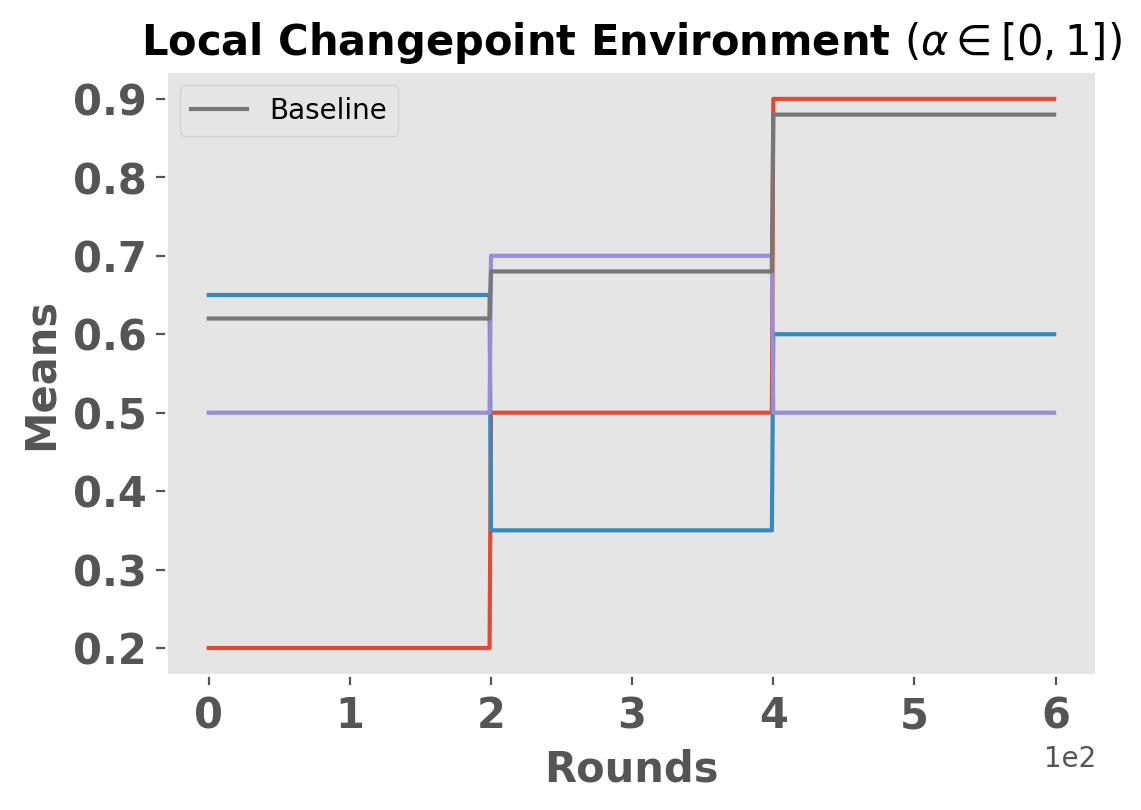

In [ ]:
import matplotlib
import matplotlib.pyplot as plt


plt.style.use('ggplot')
plt.figure(dpi=200)
# plt.plot([i for i in range(0,1500)], [env.threshold for i in range(0,1500)], '--', color='b', label = "Threshold")
#plt.plot([i for i in range(0,1500)], [1.5*env.threshold for i in range(0,1500)], '--', color='b')
#plt.plot(env.mu, 'ro')
plt.plot([i for i in range(0,env.T)], env.mu_t[0:env.T, 0:env.K-1])
plt.plot([i for i in range(0,env.T)], env.mu_t[0:env.T, env.K-1], label = "Baseline")

plt.title('Local Changepoint Environment $(\\alpha\in[0,1])$', size = 15, fontweight='bold')
plt.ylabel('Means', size = 15, fontweight='bold')
plt.xlabel('Rounds', size = 15, fontweight='bold')
    
plt.yticks(size = 15, fontweight='bold')
plt.xticks(size = 15, fontweight='bold')

#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))



plt.legend()
plt.grid()
plt.show()

# Unbalanced MOSS

In [ ]:
import numpy as np

class UMOSS_Sampling(object):

  def __init__(self, env, confidence, alpha, type_):
    
    
    self.env = env
    self.confidence = confidence
    
    self.K = env.K
    self.T = env.T
    self.trials = env.trials


    self.mu_hat = np.zeros((self.T, self.K))
    self.sumreward = np.zeros((self.T, self.K))
    self.reward_arm = np.zeros((self.T, self.K))
    self.numplays = np.zeros((self.T, self.K))
    
    self.tol = 0.01
    self.gamma = 0.01
    
    self.budget = 0
    self.budget_error = 0
    self.alpha = alpha

    self.estimated_G = np.zeros(self.K)
    self.type_ = type_
    
    
    
    self.error = np.zeros((self.trials, self.T))




  def run_algorithm(self, tr):

    self.seed = tr
    np.random.seed(self.seed)
    self.t = 0
    self.ts = np.zeros(self.K)
    self.tp = np.zeros(self.K)

    self.mu_hat = np.zeros((self.T, self.K))
    self.sumreward = np.zeros((self.T, self.K))
    self.reward_arm = np.zeros((self.T, self.K))
    self.numplays = np.zeros((self.T, self.K))
    
    #Sample each arm once
    

    for i in range(0,self.K):
      
      arm = i
      reward = self.env.pull_arm(arm, self.t)
      #self.sumreward[self.t][arm] += reward
      self.reward_arm[self.t][arm] = reward
      self.numplays[self.t][arm] = 1
      #self.mu_hat[self.t][arm] = self.sumreward[self.t][arm]/self.numplays[self.t][arm]

      self.tp[arm] += 1

      self.t += 1



    sum1 = 0.0
    self.ucb = np.zeros(self.K)
    self.lcb = np.zeros(self.K)
    self.B = np.zeros(self.K)
    while self.t < self.T:
      
      for k in range(self.K):

        if k == self.env.baseline:
          self.B[k] = (self.T*self.K)/(np.sqrt(self.T*self.K) + (self.K/(self.alpha*self.env.mu_t[self.t][self.env.baseline])))
        else:
          self.B[k] = np.sqrt(self.T*self.K) + (self.K/(self.alpha*self.env.mu_t[self.t][self.env.baseline]))
        
        n_k = (self.B[k]*self.B[k])/(self.T*self.T)
        beta_ucb = np.sqrt(4.0*np.log(max(0, (n_k/ (np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) ) ))/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1)) - np.sqrt(1.0/n_k)
        self.ucb[k] = np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) + beta_ucb
        self.lcb[k] = max(0.0,np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) - beta_ucb)

      arm = np.argmax(self.ucb)

      reward = self.env.pull_arm(arm, self.t)
      #self.sumreward[self.t][arm] += reward
      self.reward_arm[self.t][arm] = reward
      self.numplays[self.t][arm] = 1
      #self.mu_hat[self.t][arm] = self.sumreward[self.t][arm]/self.numplays[self.t][arm]
      self.mu_hat[self.t, :] = [np.sum(self.reward_arm[int(self.ts[i]):self.t,i])/(np.sum(self.numplays[int(self.ts[i]):self.t,i]) + 1 ) for i in range(self.K)]
      
      self.tp[arm] += 1
      #print("t:"+str(self.numplays[self.t]))
      # if self.t > 1.0*self.K:
      #   #print(t)

      self.budget +=  self.lcb[arm] + self.ucb[np.argmax(self.ucb)] - (1.0-self.alpha)*self.ucb[self.env.baseline]
      #self.budget_error += self.env.mu_t[self.t][arm] + self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])] - (1.0 - self.alpha)*self.env.mu_t[self.t][self.env.safe_arm]
      #self.budget_error += (1.0 - self.alpha)*self.env.mu_t[self.t][np.argmin(self.env.safe_arm_t[self.t])] - self.env.mu_t[self.t][arm] - self.env.mu_t[self.t][np.argmin(self.env.mu_t[self.t])]
      

      error1 = 0
      
      #max(-1.0*self.budget_error,0.0)
      error1 = self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])] - self.env.mu_t[self.t][arm] + max(self.budget_error, 0.0)
      #print(self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])], self.env.mu_t[self.t][arm])
      sum1 += error1
      self.error[tr][self.t] =  sum1
      #print(self.t,sum1)   
      
      if self.t%100 == 0 and self.t > 2.0*self.K:
        print("t " +str(self.t))
        print("t reward-arm: " + str([np.sum(self.reward_arm[int(self.ts[i]):self.t,i]) for i in range(self.K)]   ))
        #print(np.sum(self.tp), [int(self.tp[i]) for i in range(self.K)])
        #print(np.sum(self.numplays[int(np.min(self.ts)):int(np.max(self.tp)),:], axis = 1))
        #print(self.numplays[int(self.ts[2]):int(self.tp[2]),2], np.shape(self.numplays[int(self.ts[2]):int(self.tp[2]),2]))
        #print(self.numplays[int(self.ts[2]):self.t,2], np.sum(self.numplays[int(self.ts[2]):self.t,2]))
        print("t numplay: " + str([np.sum(self.numplays[int(self.ts[i]):self.t,i]) for i in range(self.K)]   ), str(np.sum(self.numplays[int(self.ts[i]):self.t,:])))
        print("t mu-hat: " + str([np.sum(self.reward_arm[int(self.ts[i]):self.t,i])/(np.sum(self.numplays[int(self.ts[i]):self.t,i]) + 1 ) for i in range(self.K)]   ))
        print("T true mu: " + str(self.env.mu_t[self.t]) + " Err: " + str(self.error[tr][self.t]))
        print(np.argmax(self.mu_hat[self.t]), np.argmax(self.env.mu_t[self.t]))
        print()
      
      self.t += 1

  def run_UMOSS_sampling(self, ):

    for tr in range(0,self.trials):
      
      print(tr, end=", ")
      self.run_algorithm(tr)


# T = 8000
# trials = 10
# env = build_environment(5, 0.4, T, trials)
# env.build_env1()
# umoss = UMOSS_Sampling(env, 0.10, "global")
# umoss.run_UMOSS_sampling()

# T = 1500
# trials = 5
# env = build_environment(3, 0.4, T, trials)
# env.build_env1()

# alpha_list = np.linspace(0,1,50)
print(alpha_list)
list_regret_umoss = []
for i in range(0, len(alpha_list)):
  umoss = UMOSS_Sampling(env, 0.10, alpha_list[i], "local")
  umoss.run_UMOSS_sampling()
  list_regret_umoss.append(umoss.error)




[0.001      0.02138776 0.04177551 0.06216327 0.08255102 0.10293878
 0.12332653 0.14371429 0.16410204 0.1844898  0.20487755 0.22526531
 0.24565306 0.26604082 0.28642857 0.30681633 0.32720408 0.34759184
 0.36797959 0.38836735 0.4087551  0.42914286 0.44953061 0.46991837
 0.49030612 0.51069388 0.53108163 0.55146939 0.57185714 0.5922449
 0.61263265 0.63302041 0.65340816 0.67379592 0.69418367 0.71457143
 0.73495918 0.75534694 0.77573469 0.79612245 0.8165102  0.83689796
 0.85728571 0.87767347 0.89806122 0.91844898 0.93883673 0.95922449
 0.97961224 1.        ]
0, t 100
t reward-arm: [0.641013086491916, 0.7500393020918058, 0.7446844960264348, 34.659463503751965]
t numplay: [1.0, 1.0, 1.0, 97.0] 100.0
t mu-hat: [0.320506543245958, 0.3750196510459029, 0.3723422480132174, 0.35366799493624457]
T true mu: [0.2  0.65 0.5  0.35] Err: 29.100000000000048
1 1

t 200
t reward-arm: [0.641013086491916, 0.7500393020918058, 0.7446844960264348, 71.7097877724479]
t numplay: [1.0, 1.0, 1.0, 197.0] 200.0
t mu-hat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in sqrt


Streaming output truncated to the last 5000 lines.
3 1

t 200
t reward-arm: [40.150548463466166, 0.6359332931934176, -0.03404902391711351, 0.7600677021012472]
t numplay: [197.0, 1.0, 1.0, 1.0] 200.0
t mu-hat: [0.20278054779528368, 0.3179666465967088, -0.017024511958556754, 0.3800338510506236]
T true mu: [0.7  0.3  0.5  0.35] Err: 88.20000000000032
3 0

t 300
t reward-arm: [105.41330477235249, 0.6359332931934176, -0.03404902391711351, 0.7600677021012472]
t numplay: [297.0, 1.0, 1.0, 1.0] 300.0
t mu-hat: [0.35373592205487414, 0.3179666465967088, -0.017024511958556754, 0.3800338510506236]
T true mu: [0.7  0.3  0.5  0.35] Err: 88.20000000000032
3 0

t 400
t reward-arm: [181.41690952198536, 0.6359332931934176, -0.03404902391711351, 0.7600677021012472]
t numplay: [397.0, 1.0, 1.0, 1.0] 400.0
t mu-hat: [0.4558213807085059, 0.3179666465967088, -0.017024511958556754, 0.3800338510506236]
T true mu: [0.1  0.3  0.9  0.35] Err: 89.00000000000031
0 2

t 500
t reward-arm: [187.53635349414816, 0.63593

# DUCB

In [ ]:
import numpy as np

class DUCB_Sampling(object):

  def __init__(self, env, confidence, alpha, type_):
    
    
    self.env = env
    self.confidence = confidence
    
    self.K = env.K
    self.T = env.T
    self.trials = env.trials


    self.mu_hat = np.zeros((self.T, self.K))
    self.sumreward = np.zeros((self.T, self.K))
    self.reward_arm = np.zeros((self.T, self.K))
    self.numplays = np.zeros((self.T, self.K))
    
    self.tol = 0.01
    self.gamma = 0.01
    
    self.budget = 0
    self.budget_error = 0
    self.alpha = alpha

    self.estimated_G = np.zeros(self.K)
    self.type_ = type_
    
    
    
    self.error = np.zeros((self.trials, self.T))




  def run_algorithm(self, tr):

    self.seed = tr
    np.random.seed(self.seed)
    self.t = 0
    self.ts = np.zeros(self.K)
    self.tp = np.zeros(self.K)

    self.mu_hat = np.zeros((self.T, self.K))
    self.sumreward = np.zeros((self.T, self.K))
    self.reward_arm = np.zeros((self.T, self.K))
    self.numplays = np.zeros((self.T, self.K))
    
    #Sample each arm once
    

    for i in range(0,self.K):
      
      arm = i
      reward = self.env.pull_arm(arm, self.t)
      #self.sumreward[self.t][arm] += reward
      self.reward_arm[self.t][arm] = reward
      self.numplays[self.t][arm] = 1
      #self.mu_hat[self.t][arm] = self.sumreward[self.t][arm]/self.numplays[self.t][arm]

      self.tp[arm] += 1

      self.t += 1



    sum1 = 0.0
    self.ucb = np.zeros(self.K)
    self.lcb = np.zeros(self.K)
    self.B = np.zeros(self.K)

    self.gamma = 1 - (1/(4.0*np.sqrt(self.T)))
    while self.t < self.T:
      
      for k in range(self.K):

        
        beta_ucb = 2.0*np.sqrt(2.0*np.log(self.t+1.0)/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1))
        #print(beta_ucb)
        self.ucb[k] = np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) + beta_ucb
        self.lcb[k] = max(0.0,np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) - beta_ucb)

      arm = np.argmax(self.ucb)

      reward = self.gamma*self.env.pull_arm(arm, self.t)
      #self.sumreward[self.t][arm] += reward
      self.reward_arm[self.t][arm] = reward
      self.numplays[self.t][arm] = self.gamma*1
      #self.mu_hat[self.t][arm] = self.sumreward[self.t][arm]/self.numplays[self.t][arm]
      self.mu_hat[self.t, :] = [np.sum(self.reward_arm[int(self.ts[i]):self.t,i])/(np.sum(self.numplays[int(self.ts[i]):self.t,i]) + 1 ) for i in range(self.K)]
      
      self.tp[arm] += 1
      #print("t:"+str(self.numplays[self.t]))
      # if self.t > 1.0*self.K:
      #   #print(t)

      self.budget +=  self.lcb[arm] + self.lcb[np.argmax(self.ucb)] - (1.0 - self.alpha)*self.ucb[np.argmin(self.env.safe_arm_t[self.t])]
      #self.budget_error += self.env.mu_t[self.t][arm] + self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])] - (1.0 - self.alpha)*self.env.mu_t[self.t][self.env.safe_arm]
      #self.budget_error += (1.0 - self.alpha)*self.env.mu_t[self.t][np.argmin(self.env.safe_arm_t[self.t])] - self.env.mu_t[self.t][arm] - self.env.mu_t[self.t][np.argmin(self.env.mu_t[self.t])]
      

      error1 = 0
      
      #max(-1.0*self.budget_error,0.0)
      error1 = self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])] - self.env.mu_t[self.t][arm] + max(self.budget_error, 0.0)
      #print(self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])], self.env.mu_t[self.t][arm])
      sum1 += error1
      self.error[tr][self.t] =  sum1
      #print(self.t,sum1)   
      
      if self.t%100 == 0 and self.t > 2.0*self.K:
        print("t " +str(self.t))
        print("t reward-arm: " + str([np.sum(self.reward_arm[int(self.ts[i]):self.t,i]) for i in range(self.K)]   ))
        #print(np.sum(self.tp), [int(self.tp[i]) for i in range(self.K)])
        #print(np.sum(self.numplays[int(np.min(self.ts)):int(np.max(self.tp)),:], axis = 1))
        #print(self.numplays[int(self.ts[2]):int(self.tp[2]),2], np.shape(self.numplays[int(self.ts[2]):int(self.tp[2]),2]))
        #print(self.numplays[int(self.ts[2]):self.t,2], np.sum(self.numplays[int(self.ts[2]):self.t,2]))
        print("t numplay: " + str([np.sum(self.numplays[int(self.ts[i]):self.t,i]) for i in range(self.K)]   ), str(np.sum(self.numplays[int(self.ts[i]):self.t,:])))
        print("t mu-hat: " + str([np.sum(self.reward_arm[int(self.ts[i]):self.t,i])/(np.sum(self.numplays[int(self.ts[i]):self.t,i]) + 1 ) for i in range(self.K)]   ))
        print("T true mu: " + str(self.env.mu_t[self.t]) + " Err: " + str(self.error[tr][self.t]))
        print(np.argmax(self.mu_hat[self.t]), np.argmax(self.env.mu_t[self.t]))
        print()
      
      self.t += 1

  def run_DUCB_sampling(self, ):

    for tr in range(0,self.trials):
      
      print(tr, end=", ")
      self.run_algorithm(tr)


# T = 1500
# trials = 10
# env = build_environment(3, 0.4, T, trials)
# env.build_env1()
# ducb = DUCB_Sampling(env, 0.10, "local")
# ducb.run_DUCB_sampling()

# T = 1500
# trials = 5
# env = build_environment(3, 0.4, T, trials)
# env.build_env1()

# alpha_list = np.linspace(0,1,50)
# print(alpha_list)
list_regret_ducb = []
for i in range(0, len(alpha_list)):
  ducb = DUCB_Sampling(env, 0.10, alpha_list[i], "local")
  ducb.run_DUCB_sampling()
  list_regret_ducb.append(ducb.error)




Streaming output truncated to the last 5000 lines.
1 1

t 200
t reward-arm: [8.34537108769529, 46.841980248988335, 12.142152294986378, 19.912666813256983]
t numplay: [34.65298895310572, 75.23453445538026, 40.59175170953613, 47.52030825870496] 197.99958337672706
t mu-hat: [0.23407213063319693, 0.614445678505517, 0.2919365450097749, 0.4103986047880164]
T true mu: [0.7  0.3  0.5  0.35] Err: 35.79999999999996
1 0

t 300
t reward-arm: [36.44299082337976, 47.01143122964978, 22.009218141318257, 31.467855147659364]
t numplay: [73.25494686990345, 91.0712351391947, 60.3876275643042, 72.26515307716504] 296.9789626505674
t mu-hat: [0.4907819931139242, 0.5105984638804637, 0.3585285669862932, 0.42950644100226587]
T true mu: [0.7  0.3  0.5  0.35] Err: 54.55000000000003
1 0

t 400
t reward-arm: [58.02961068543197, 47.200095715207524, 35.602859430963534, 34.52254837627321]
t numplay: [112.84669857943958, 105.91814203027076, 89.0916475537179, 88.1018537609795] 395.9583419244077
t mu-hat: [0.509717114413

# GLR-UCB

In [ ]:
import numpy as np
import math

class GLR_UCB_Sampling(object):

  def __init__(self, env, confidence, alpha, type_):
    
    
    self.env = env
    self.confidence = confidence
    
    self.K = env.K
    self.T = env.T
    self.trials = env.trials


    self.mu_hat = np.zeros((self.T, self.K))
    self.sumreward = np.zeros((self.T, self.K))
    self.reward_arm = np.zeros((self.T, self.K))
    self.numplays = np.zeros((self.T, self.K))
    
    self.tol = 0.01
    self.gamma = 0.01
    
    self.budget = 0
    self.budget_error = 0
    self.alpha = alpha

    self.estimated_G = np.zeros(self.K)
    self.type_ = type_
    
    
    
    self.error = np.zeros((self.trials, self.T))
  
  def klGauss(self, x, y, sig2 = 0.1):
        """caution modified"""
        """Kullback-Leibler divergence for Gaussian distributions."""
        return ((x-y)*(x-y))/(2*sig2)

  def klucbGauss(self, x, d, sig2=1., precision=0.):
      """klUCB index computation for Gaussian distributions.
    
      Note that it does not require any search.
      """
      #print 2.0*sig2*d, x
      return x + math.sqrt(2.0*sig2*d)

  def klucb(self, x, d, upperbound, lowerbound=-float('inf'), precision=1e-6):
    
        """The generic klUCB index computation.
    
        Input args.: x, d, div, upperbound, lowerbound=-float('inf'), precision=1e-6,
        where div is the KL divergence to be used.
        """
        l = max(x, lowerbound)
        u = upperbound
        while u-l > precision:
            m = (l+u)/2
            if self.klGauss(x, m) > d:
                u = m
            else:
                l = m
        return (l+u)/2

  def detect_changepoint(self, ts, tp):

   

    for k in range(self.K):
      
      #print(tp)
      kl_list = []
      for t_ in range(int(ts[k])+1,self.t):

        # self.klucb(self.global_payoffSums[actionTaken]/(self.global_numPlays[actionTaken]+1), 
        #(math.log(self.t+1) + self.c * math.log(math.log(self.t+1)))  / (self.global_numPlays[actionTaken]+1), 1e-4) # Could adapt tolerance to the value of self.t


        
        # beta_ts = np.sqrt(0.5*np.log((self.t+1)/self.confidence)/(np.sum(self.numplays[int(ts[k]):t_, k]) + 1))
        # beta_tp = np.sqrt(0.5*np.log((self.t+1)/self.confidence)/(np.sum(self.numplays[t_:self.t, k]) + 1))

        # beta_ts = 5.0*np.log((self.t+1)/self.confidence)/(np.sum(self.numplays[int(ts[k]):t_, k]) + 1)
        # beta_tp = 5.0*np.log((self.t+1)/self.confidence)/(np.sum(self.numplays[t_:self.t, k]) + 1)

        emp_mean_ts = np.sum(self.reward_arm[int(ts[k]):t_, k])/(np.sum(self.numplays[int(ts[k]):t_, k])+1)
        emp_mean_tp = np.sum(self.reward_arm[t_:self.t, k])/(np.sum(self.numplays[t_:self.t, k]) + 1)
        emp_mean_tot = np.sum(self.reward_arm[int(ts[k]):self.t, k])/(np.sum(self.numplays[int(ts[k]):self.t, k]) + 1)

        s = np.sum(self.numplays[int(ts[k]):t_, k])+1
        n = (np.sum(self.numplays[t_:self.t, k]) + 1)
        n_s = n - s

        #kl_list.append(s*self.klucb(emp_mean_ts, emp_mean_tot, 1e-4) + n_s*self.klucb(emp_mean_tp, emp_mean_tot, 1e-4))
        kl_list.append(s*self.klGauss(emp_mean_ts, emp_mean_tot) + n_s*self.klGauss(emp_mean_tp, emp_mean_tot))
      
      self.confidence = 1.0/self.t
      self.conf_inf = 1.0*np.log(3.0*math.pow(self.t,3.0/2.0)/self.confidence)
      #self.conf_inf = 8.0*np.log(3.0*self.t)


      if max(kl_list) > self.conf_inf:
        
        #if s*self.klGauss(emp_mean_ts, emp_mean_tot) + n_s*self.klGauss(emp_mean_tp, emp_mean_tot) > self.conf_inf:
          if self.type_ == "global":
            for k1 in range(self.K):

              self.estimated_G[k1] += 1

              #print(self.mu_hat[int(ts[k1]): int(tp[k1]), k1])
              self.mu_hat[int(ts[k1]): self.t, k1] = 0.0
              #print(self.mu_hat[int(ts[k1]): int(tp[k1]), k1])
              self.numplays[int(ts[k1]): self.t, k1] = 0
              self.sumreward[int(ts[k1]): self.t, k1] = 0.0
              self.reward_arm[int(ts[k1]): self.t, k1] = 0.0
              self.ts[k1] = self.t

              #print(self.reward_arm[0: self.t, k])
            print("Global Changepoint Detected at time " + str(self.t))
            
            break
          
          else:
            
            self.estimated_G[k] += 1
            self.mu_hat[int(ts[k]): self.t, k] = 0.0
            self.numplays[int(ts[k]): self.t, k] = 0
            self.sumreward[int(ts[k]): self.t, k] = 0.0
            self.reward_arm[int(ts[k]): self.t, k] = 0.0
            self.ts[k] = self.t

            

            print("Arm "+ str(k) +" Changepoint Detected at time " + str(self.t))
            continue



  def run_algorithm(self, tr):

    self.seed = tr
    np.random.seed(self.seed)
    self.t = 0
    self.ts = np.zeros(self.K)
    self.tp = np.zeros(self.K)

    self.mu_hat = np.zeros((self.T, self.K))
    self.sumreward = np.zeros((self.T, self.K))
    self.reward_arm = np.zeros((self.T, self.K))
    self.numplays = np.zeros((self.T, self.K))
    
    #Sample each arm once
    

    for i in range(0,self.K):
      
      arm = i
      reward = self.env.pull_arm(arm, self.t)
      #self.sumreward[self.t][arm] += reward
      self.reward_arm[self.t][arm] = reward
      self.numplays[self.t][arm] = 1
      #self.mu_hat[self.t][arm] = self.sumreward[self.t][arm]/self.numplays[self.t][arm]

      self.tp[arm] += 1

      self.t += 1



    sum1 = 0.0
    self.ucb = np.zeros(self.K)
    self.lcb = np.zeros(self.K)
    self.gamma = np.sqrt(np.log(self.T)/self.T)

    while self.t < self.T:
      
      for k in range(self.K):

        beta_ucb = np.sqrt(1.0*np.log(np.log(self.t+1)/self.confidence)/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1))
        self.ucb[k] = np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) + beta_ucb
        self.lcb[k] = max(0.0,np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) - beta_ucb)

      
      if self.t% (self.K/self.gamma) <= self.K:
        arm = np.random.randint(0, self.K-1)
        #print("fe", arm, self.t% (self.K/self.gamma))
      else:
        arm = np.argmax(self.ucb)

      reward = self.env.pull_arm(arm, self.t)
      #self.sumreward[self.t][arm] += reward
      self.reward_arm[self.t][arm] = reward
      self.numplays[self.t][arm] = 1
      #self.mu_hat[self.t][arm] = self.sumreward[self.t][arm]/self.numplays[self.t][arm]
      self.mu_hat[self.t, :] = [np.sum(self.reward_arm[int(self.ts[i]):self.t,i])/(np.sum(self.numplays[int(self.ts[i]):self.t,i]) + 1 ) for i in range(self.K)]
      
      self.tp[arm] += 1
      #print("t:"+str(self.numplays[self.t]))
      # if self.t > 1.0*self.K:
      #   #print(t)

      self.budget +=  self.lcb[arm] + self.lcb[np.argmax(self.ucb)] - (1.0 - self.alpha)*self.ucb[np.argmin(self.env.safe_arm_t[self.t])]
      #self.budget_error += self.env.mu_t[self.t][arm] + self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])] - (1.0 - self.alpha)*self.env.mu_t[self.t][self.env.safe_arm]
      #self.budget_error += (1.0 - self.alpha)*self.env.mu_t[self.t][np.argmin(self.env.safe_arm_t[self.t])] - self.env.mu_t[self.t][arm] - self.env.mu_t[self.t][np.argmin(self.env.mu_t[self.t])]


      if self.t%20 == 0:
        self.detect_changepoint(self.ts, self.tp)
      
      

      error1 = 0
      
      #max(-1.0*self.budget_error,0.0)
      error1 = self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])] - self.env.mu_t[self.t][arm] + max(self.budget_error, 0.0)
      #print(self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])], self.env.mu_t[self.t][arm])
      sum1 += error1
      self.error[tr][self.t] =  sum1
      #print(self.t,sum1)   
      
      if self.t%100 == 0 and self.t > 2.0*self.K:
        print("t " +str(self.t))
        print("t reward-arm: " + str([np.sum(self.reward_arm[int(self.ts[i]):self.t,i]) for i in range(self.K)]   ))
        #print(np.sum(self.tp), [int(self.tp[i]) for i in range(self.K)])
        #print(np.sum(self.numplays[int(np.min(self.ts)):int(np.max(self.tp)),:], axis = 1))
        #print(self.numplays[int(self.ts[2]):int(self.tp[2]),2], np.shape(self.numplays[int(self.ts[2]):int(self.tp[2]),2]))
        #print(self.numplays[int(self.ts[2]):self.t,2], np.sum(self.numplays[int(self.ts[2]):self.t,2]))
        print("t numplay: " + str([np.sum(self.numplays[int(self.ts[i]):self.t,i]) for i in range(self.K)]   ), str(np.sum(self.numplays[int(self.ts[i]):self.t,:])))
        print("t mu-hat: " + str([np.sum(self.reward_arm[int(self.ts[i]):self.t,i])/(np.sum(self.numplays[int(self.ts[i]):self.t,i]) + 1 ) for i in range(self.K)]   ))
        print("T true mu: " + str(self.env.mu_t[self.t]) + " Err: " + str(self.error[tr][self.t]))
        print(np.argmax(self.mu_hat[self.t]), np.argmax(self.env.mu_t[self.t]))
        print(self.budget, self.budget_error)
        print()
      
      self.t += 1

  def run_GLR_UCB_sampling(self, ):

    for tr in range(0,self.trials):
      
      print(tr, end=", ")
      self.run_algorithm(tr)


# T = 8000
# trials = 10
# env = build_environment(5, 0.4, T, trials)
# env.build_env1()
# glrucb = GLR_UCB_Sampling(env, 0.10, "local")
# glrucb.run_GLR_UCB_sampling()

# T = 1500
# trials = 5
# env = build_environment(3, 0.4, T, trials)
# env.build_env1()

# alpha_list = np.linspace(0,1,50)
# print(alpha_list)

list_regret_glrucb = []
for i in range(0, len(alpha_list)):
  glrucb = GLR_UCB_Sampling(env, 0.10, alpha_list[i], "local")
  glrucb.run_GLR_UCB_sampling()
  list_regret_glrucb.append(glrucb.error)




Streaming output truncated to the last 5000 lines.

Arm 2 Changepoint Detected at time 540
1, t 100
t reward-arm: [4.796618680607886, 30.885815728216237, 9.097509306969494, 5.1327083428021965]
t numplay: [14.0, 50.0, 21.0, 15.0] 100.0
t mu-hat: [0.3197745787071924, 0.6056042299650243, 0.41352315031679515, 0.3207942714251373]
T true mu: [0.2  0.65 0.5  0.35] Err: 13.500000000000005
1 1
-12.023762781448921 0

t 200
t reward-arm: [5.510239933808173, 68.76907727908893, 19.317835850684112, 9.503674486775495]
t numplay: [20.0, 112.0, 42.0, 26.0] 200.0
t mu-hat: [0.2623923778003892, 0.6085759051246808, 0.4492519965275375, 0.35198794395464794]
T true mu: [0.7  0.3  0.5  0.35] Err: 22.549999999999983
1 0
-11.405179215167864 0

Arm 0 Changepoint Detected at time 300
t 300
t reward-arm: [0.0, 71.49216244116022, 22.525692304892644, 11.74355408394359]
t numplay: [0.0, 120.0, 48.0, 31.0] 199.0
t mu-hat: [0.0, 0.590844317695539, 0.45970800622229885, 0.36698606512323717]
T true mu: [0.7  0.3  0.5  0.3

# Conservative-UCB

In [ ]:
import numpy as np

class CUCB_Sampling(object):

  def __init__(self, env, confidence, alpha, type_):
    
    
    self.env = env
    self.confidence = confidence
    
    self.K = env.K
    self.T = env.T
    self.trials = env.trials


    self.mu_hat = np.zeros((self.T, self.K))
    self.sumreward = np.zeros((self.T, self.K))
    self.reward_arm = np.zeros((self.T, self.K))
    self.numplays = np.zeros((self.T, self.K))
    
    self.tol = 0.01
    self.gamma = 0.01
    
    self.budget = 0
    self.budget_error = 0
    self.alpha = alpha

    self.estimated_G = np.zeros(self.K)
    self.type_ = type_
    
    
    
    self.error = np.zeros((self.trials, self.T))
  

  def detect_changepoint(self, ts, tp):

   

    for k in range(self.K):
      
      #print(tp)
      for t_ in range(int(ts[k])+1,self.t):

        
        beta_ts = np.sqrt(0.5*np.log((self.t+1)/self.confidence)/(np.sum(self.numplays[int(ts[k]):t_, k]) + 1))
        beta_tp = np.sqrt(0.5*np.log((self.t+1)/self.confidence)/(np.sum(self.numplays[t_:self.t, k]) + 1))

        if (np.sum(self.reward_arm[int(ts[k]):t_, k])/(np.sum(self.numplays[int(ts[k]):t_, k])+1) - beta_ts > np.sum(self.reward_arm[t_:self.t, k])/(np.sum(self.numplays[t_:self.t, k]) + 1) + beta_tp) \
          or (np.sum(self.reward_arm[int(ts[k]):t_, k])/(np.sum(self.numplays[int(ts[k]):t_, k]) + 1) + beta_ts < np.sum(self.reward_arm[t_:self.t, k])/(np.sum(self.numplays[t_:self.t, k]) + 1) - beta_tp): 
            
         

          if self.type_ == "global":
            for k1 in range(self.K):

              self.estimated_G[k1] += 1

              #print(self.mu_hat[int(ts[k1]): int(tp[k1]), k1])
              self.mu_hat[int(ts[k1]): self.t, k1] = 0.0
              #print(self.mu_hat[int(ts[k1]): int(tp[k1]), k1])
              self.numplays[int(ts[k1]): self.t, k1] = 0
              self.sumreward[int(ts[k1]): self.t, k1] = 0.0
              self.reward_arm[int(ts[k1]): self.t, k1] = 0.0
              self.ts[k1] = self.t

              #print(self.reward_arm[0: self.t, k])
            print("Global Changepoint Detected at time " + str(self.t))
            
            return True
          
          else:
            
            self.estimated_G[k] += 1
            self.mu_hat[int(ts[k]): self.t, k] = 0.0
            self.numplays[int(ts[k]): self.t, k] = 0
            self.sumreward[int(ts[k]): self.t, k] = 0.0
            self.reward_arm[int(ts[k]): self.t, k] = 0.0
            self.ts[k] = self.t

            

            print("Arm "+ str(k) +" Changepoint Detected at time " + str(self.t))
            continue



  def run_algorithm(self, tr):

    self.seed = tr
    np.random.seed(self.seed)
    self.t = 0
    self.ts = np.zeros(self.K)
    self.tp = np.zeros(self.K)

    self.budget = 0

    self.mu_hat = np.zeros((self.T, self.K))
    self.sumreward = np.zeros((self.T, self.K))
    self.reward_arm = np.zeros((self.T, self.K))
    self.numplays = np.zeros((self.T, self.K))

    #Sample each arm once
    

    for i in range(0,self.K):
      
      arm = i
      reward = self.env.pull_arm(arm, self.t)
      #self.sumreward[self.t][arm] += reward
      self.reward_arm[self.t][arm] = reward
      self.numplays[self.t][arm] = 1
      #self.mu_hat[self.t][arm] = self.sumreward[self.t][arm]/self.numplays[self.t][arm]

      self.tp[arm] += 1

      self.t += 1



    sum1 = 0.0
    self.ucb = np.zeros(self.K)
    self.lcb = np.zeros(self.K)

    while self.t < self.T:
      
      for k in range(self.K):

        beta_ucb = np.sqrt(1.5*np.log((self.t+1)/self.confidence)/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1))
        self.ucb[k] = np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) + beta_ucb
        self.lcb[k] = max(0.0,np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) - beta_ucb)

      if self.budget >= 0:
        arm = np.argmax(self.ucb)
      else:
        #arm = self.env.safe_arm
        arm = self.env.baseline

      reward = self.env.pull_arm(arm, self.t)
      #self.sumreward[self.t][arm] += reward
      self.reward_arm[self.t][arm] = reward
      self.numplays[self.t][arm] = 1
      #self.mu_hat[self.t][arm] = self.sumreward[self.t][arm]/self.numplays[self.t][arm]
      self.mu_hat[self.t, :] = [np.sum(self.reward_arm[int(self.ts[i]):self.t,i])/(np.sum(self.numplays[int(self.ts[i]):self.t,i]) + 1 ) for i in range(self.K)]
      
      self.tp[arm] += 1
      #print("t:"+str(self.numplays[self.t]))
      # if self.t > 1.0*self.K:
      #   #print(t)

      #self.budget +=  self.lcb[arm] + self.lcb[np.argmax(self.ucb)] - (1.0-self.alpha)*self.env.mu_t[self.t][np.argmin(self.env.safe_arm_t[self.t])]
      #print(self.env.baseline)
      #self.budget +=  self.lcb[arm] + self.lcb[np.argmax(self.ucb)] - (1.0-self.alpha)*self.ucb[self.env.baseline] - self.alpha*self.env.threshold
      #self.budget +=  self.lcb[arm] + self.lcb[np.argmax(self.ucb)] - (1.0-self.alpha)*self.ucb[self.env.baseline]
      self.budget +=  self.lcb[arm] + self.lcb[np.argmax(self.ucb)] - (1.0-self.alpha)*self.ucb[self.env.baseline]
      
      
      error1 = 0
      
      
      error1 = self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])] - self.env.mu_t[self.t][arm] + max(self.budget_error, 0.0)
      #print(self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])], self.env.mu_t[self.t][arm])
      sum1 += error1
      self.error[tr][self.t] =  sum1
      #print(self.t,sum1)   
      
      if self.t%100 == 0 and self.t > 2.0*self.K:
        print("t " +str(self.t))
        print("t reward-arm: " + str([np.sum(self.reward_arm[int(self.ts[i]):self.t,i]) for i in range(self.K)]   ))
        #print(np.sum(self.tp), [int(self.tp[i]) for i in range(self.K)])
        #print(np.sum(self.numplays[int(np.min(self.ts)):int(np.max(self.tp)),:], axis = 1))
        #print(self.numplays[int(self.ts[2]):int(self.tp[2]),2], np.shape(self.numplays[int(self.ts[2]):int(self.tp[2]),2]))
        #print(self.numplays[int(self.ts[2]):self.t,2], np.sum(self.numplays[int(self.ts[2]):self.t,2]))
        print("t numplay: " + str([np.sum(self.numplays[int(self.ts[i]):self.t,i]) for i in range(self.K)]   ), str(np.sum(self.numplays[int(self.ts[i]):self.t,:])))
        print("t mu-hat: " + str([np.sum(self.reward_arm[int(self.ts[i]):self.t,i])/(np.sum(self.numplays[int(self.ts[i]):self.t,i]) + 1 ) for i in range(self.K)]   ))
        print("T true mu: " + str(self.env.mu_t[self.t]) + " Err: " + str(self.error[tr][self.t]))
        print(np.argmax(self.mu_hat[self.t]), np.argmax(self.env.mu_t[self.t]))
        print(self.budget, self.budget_error)
        print()
      
      self.t += 1

  def run_CUCB_sampling(self, ):

    for tr in range(0,self.trials):
      
      print(tr, end=", ")
      self.run_algorithm(tr)


# T = 8000
# trials = 10
# env = build_environment(5, 0.4, T, trials)
# env.build_env1()
# cucb = CUCB_Sampling(env, 0.10, 0.1, "local")
# cucb.run_CUCB_sampling()

# T = 1500
# trials = 5
# env = build_environment(3, 0.4, T, trials)
# env.build_env1()

# alpha_list = np.linspace(0,1,50)
# print(alpha_list)

list_regret_cucb = []
for i in range(0, len(alpha_list)):
  cucb = CUCB_Sampling(env, 0.10, alpha_list[i], "local")
  cucb.run_CUCB_sampling()
  list_regret_cucb.append(cucb.error)




Streaming output truncated to the last 5000 lines.
1, t 100
t reward-arm: [2.88975299298792, 0.03824358634992464, -0.028171752263455696, 38.30846038049548]
t numplay: [2.0, 1.0, 1.0, 96.0] 100.0
t mu-hat: [0.96325099766264, 0.01912179317496232, -0.014085876131727848, 0.39493258124222147]
T true mu: [0.2  0.65 0.5  0.35] Err: 29.250000000000046
0 1
-61.22157221582125 0

t 200
t reward-arm: [2.88975299298792, 0.03824358634992464, -0.028171752263455696, 88.58793814251533]
t numplay: [2.0, 1.0, 1.0, 196.0] 200.0
t mu-hat: [0.96325099766264, 0.01912179317496232, -0.014085876131727848, 0.4496849651904331]
T true mu: [0.7  0.3  0.5  0.35] Err: 59.2999999999998
0 0
-105.34858827617543 0

t 300
t reward-arm: [2.88975299298792, 0.03824358634992464, -0.028171752263455696, 124.57012761877385]
t numplay: [2.0, 1.0, 1.0, 296.0] 300.0
t mu-hat: [0.96325099766264, 0.01912179317496232, -0.014085876131727848, 0.4194280391204507]
T true mu: [0.7  0.3  0.5  0.35] Err: 94.29999999999933
0 0
-138.5070415428

# SLR 

In [ ]:
import numpy as np

class SLR_Sampling(object):

  def __init__(self, env, confidence, alpha, type_):
    
    
    self.env = env
    self.confidence = confidence
    
    self.K = env.K
    self.T = env.T
    self.trials = env.trials


    self.mu_hat = np.zeros((self.T, self.K))
    self.sumreward = np.zeros((self.T, self.K))
    self.reward_arm = np.zeros((self.T, self.K))
    self.numplays = np.zeros((self.T, self.K))
    
    self.tol = 0.01
    self.gamma = 0.01
    
    self.budget = 0
    self.budget_error = 0
    self.alpha = alpha

    self.estimated_G = np.zeros(self.K)
    self.type_ = type_
    
    
    
    self.error = np.zeros((self.trials, self.T))
  

  def detect_changepoint(self, ts, tp):

   

    for k in range(self.K):
      
      #print(tp)
      for t_ in range(int(ts[k])+1,self.t):

        
        beta_ts = np.sqrt(0.5*np.log(np.log(self.t+1)/self.confidence)/(np.sum(self.numplays[int(ts[k]):t_, k]) + 1))
        beta_tp = np.sqrt(0.5*np.log(np.log(self.t+1)/self.confidence)/(np.sum(self.numplays[t_:self.t, k]) + 1))

        if (np.sum(self.reward_arm[int(ts[k]):t_, k])/(np.sum(self.numplays[int(ts[k]):t_, k])+1) - beta_ts > np.sum(self.reward_arm[t_:self.t, k])/(np.sum(self.numplays[t_:self.t, k]) + 1) + beta_tp) \
          or (np.sum(self.reward_arm[int(ts[k]):t_, k])/(np.sum(self.numplays[int(ts[k]):t_, k]) + 1) + beta_ts < np.sum(self.reward_arm[t_:self.t, k])/(np.sum(self.numplays[t_:self.t, k]) + 1) - beta_tp): 
            
         

          if self.type_ == "global":
            for k1 in range(self.K):

              self.estimated_G[k1] += 1

              #print(self.mu_hat[int(ts[k1]): int(tp[k1]), k1])
              self.mu_hat[int(ts[k1]): self.t, k1] = 0.0
              #print(self.mu_hat[int(ts[k1]): int(tp[k1]), k1])
              self.numplays[int(ts[k1]): self.t, k1] = 0
              self.sumreward[int(ts[k1]): self.t, k1] = 0.0
              self.reward_arm[int(ts[k1]): self.t, k1] = 0.0
              self.ts[k1] = self.t
              self.safe_set = set()
              self.budget = 0.0
              #print(self.reward_arm[0: self.t, k])
            print("Global Changepoint Detected at time " + str(self.t))
            
            return True
          
          else:
            
            self.estimated_G[k] += 1
            self.mu_hat[int(ts[k]): self.t, k] = 0.0
            self.numplays[int(ts[k]): self.t, k] = 0
            self.sumreward[int(ts[k]): self.t, k] = 0.0
            self.reward_arm[int(ts[k]): self.t, k] = 0.0
            self.ts[k] = self.t
            self.safe_set = set()
            self.budget = 0.0

            print("Arm "+ str(k) +" Changepoint Detected at time " + str(self.t))
            continue

  def safe_set_function(self, ):
    
    self.safe_set = set()
    for k in range(0, self.K-1):

      if self.mu_hat[self.t-1][k] >= self.alpha*self.env.threshold:
        
        self.safe_set.add((k, self.mu_hat[self.t-1][k]))
    
    return self.safe_set

  def run_algorithm(self, tr):

    self.seed = tr
    np.random.seed(self.seed)
    self.t = 0
    self.ts = np.zeros(self.K)
    self.tp = np.zeros(self.K)

    self.budget = 0

    self.mu_hat = np.zeros((self.T, self.K))
    self.sumreward = np.zeros((self.T, self.K))
    self.reward_arm = np.zeros((self.T, self.K))
    self.numplays = np.zeros((self.T, self.K))

    #Sample each arm once
    

    for i in range(0,self.K):
      
      arm = i
      reward = self.env.pull_arm(arm, self.t)
      #self.sumreward[self.t][arm] += reward
      self.reward_arm[self.t][arm] = reward
      self.numplays[self.t][arm] = 1
      #self.mu_hat[self.t][arm] = self.sumreward[self.t][arm]/self.numplays[self.t][arm]

      self.tp[arm] += 1

      self.t += 1



    sum1 = 0.0
    self.ucb = np.zeros(self.K)
    self.lcb = np.zeros(self.K)
    self.B = np.zeros(self.K)
    self.safe_set = set()
    self.gamma = np.sqrt(np.log(self.T)/self.T)

    while self.t < self.T:
      
      for k in range(self.K):

        beta_ucb = np.sqrt(1.0*np.log(np.log(self.t+1)/self.confidence)/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1))
        self.ucb[k] = np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) + beta_ucb
        self.lcb[k] = max(0.0,np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) - beta_ucb)
        self.B[k] = abs(np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) - self.alpha*self.env.threshold)*np.sqrt((np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1))

      
      self.safe_set = self.safe_set_function()

      if self.budget >= 0:
        if self.t% (self.K/self.gamma) <= self.K:
          arm = np.random.randint(0, self.K-1)
          #print("fe", arm, self.t% (self.K/self.gamma))
        else:
          arm = np.argmax(self.ucb)
      elif self.budget < 0:
        arm = self.env.baseline

      
      reward = self.env.pull_arm(arm, self.t)
      #self.sumreward[self.t][arm] += reward
      self.reward_arm[self.t][arm] = reward
      self.numplays[self.t][arm] = 1
      #self.mu_hat[self.t][arm] = self.sumreward[self.t][arm]/self.numplays[self.t][arm]
      self.mu_hat[self.t, :] = [np.sum(self.reward_arm[int(self.ts[i]):self.t,i])/(np.sum(self.numplays[int(self.ts[i]):self.t,i]) + 1 ) for i in range(self.K)]
      
      self.tp[arm] += 1
      
      self.budget +=  self.lcb[arm] + self.ucb[np.argmax(self.mu_hat[self.t, :])] - (1.0 - self.alpha)*self.ucb[self.env.baseline]
      #self.budget_error += self.env.mu_t[self.t][arm] + self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])] - (1.0 - self.alpha)*self.env.mu_t[self.t][self.env.safe_arm]
      #self.budget_error += (1.0 - self.alpha)*self.env.mu_t[self.t][np.argmin(self.env.safe_arm_t[self.t])] - self.env.mu_t[self.t][arm] - self.env.mu_t[self.t][np.argmin(self.env.mu_t[self.t])]


      if self.t%5 == 0:
        self.detect_changepoint(self.ts, self.tp)
        
      error1 = 0
      
      
      error1 = self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])] - self.env.mu_t[self.t][arm] + max(self.budget_error, 0.0)
      #print(self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])], self.env.mu_t[self.t][arm])
      sum1 += error1
      self.error[tr][self.t] =  sum1
      #print(self.t,sum1)   
      
      if self.t%100 == 0 and self.t > 2.0*self.K:
        print("t " +str(self.t))
        print("t reward-arm: " + str([np.sum(self.reward_arm[int(self.ts[i]):self.t,i]) for i in range(self.K)]   ))
        #print(np.sum(self.tp), [int(self.tp[i]) for i in range(self.K)])
        #print(np.sum(self.numplays[int(np.min(self.ts)):int(np.max(self.tp)),:], axis = 1))
        #print(self.numplays[int(self.ts[2]):int(self.tp[2]),2], np.shape(self.numplays[int(self.ts[2]):int(self.tp[2]),2]))
        #print(self.numplays[int(self.ts[2]):self.t,2], np.sum(self.numplays[int(self.ts[2]):self.t,2]))
        print("t numplay: " + str([np.sum(self.numplays[int(self.ts[i]):self.t,i]) for i in range(self.K)]   ), str(np.sum(self.numplays[int(self.ts[i]):self.t,:])))
        print("t mu-hat: " + str([np.sum(self.reward_arm[int(self.ts[i]):self.t,i])/(np.sum(self.numplays[int(self.ts[i]):self.t,i]) + 1 ) for i in range(self.K)]   ))
        print("T true mu: " + str(self.env.mu_t[self.t]) + " Err: " + str(self.error[tr][self.t]))
        print(np.argmax(self.mu_hat[self.t]), np.argmax(self.env.mu_t[self.t]))
        print(self.budget, self.budget_error, self.safe_set)
        print()
      
      self.t += 1

  def run_SLR_sampling(self, ):

    for tr in range(0,self.trials):
      
      print(tr, end=", ")
      self.run_algorithm(tr)


# T = 1500
# trials = 1
# env = build_environment(3, 0.4, T, trials)
# env.build_env1()

# alpha_list = np.linspace(0.001,1,5)
# print(alpha_list)

list_regret_slr = []
for i in range(0, len(alpha_list)):
  slr = SLR_Sampling(env, 0.10, alpha_list[i], "local")
  slr.run_SLR_sampling()
  list_regret_slr.append(slr.error)




Streaming output truncated to the last 5000 lines.

Arm 2 Changepoint Detected at time 235
t 300
t reward-arm: [1.974997600816593, -3.353939289724397, 31.19439405370265, -0.5833760742030902]
t numplay: [12.0, 5.0, 61.0, 13.0] 91.0
t mu-hat: [0.15192289237050716, -0.5589898816207328, 0.503135387962946, -0.04166971958593502]
T true mu: [0.7  0.3  0.5  0.35] Err: 40.60000000000006
2 0
65.90595608780058 0 {(2, 0.5149814050751741)}

Arm 0 Changepoint Detected at time 315
Arm 2 Changepoint Detected at time 400
t 400
t reward-arm: [-0.06611183700761769, -4.474856452996409, 0.0, -0.5833760742030898]
t numplay: [8.0, 8.0, 0.0, 13.0] 29.0
t mu-hat: [-0.007345759667513076, -0.4972062725551566, 0.0, -0.04166971958593498]
T true mu: [0.1  0.3  0.9  0.35] Err: 59.0000000000003
2 2
0.0 0 set()

Arm 2 Changepoint Detected at time 415
Arm 2 Changepoint Detected at time 455
Arm 1 Changepoint Detected at time 470
Arm 2 Changepoint Detected at time 485
t 500
t reward-arm: [-0.45066515256232265, 2.70210018

# SGR

In [ ]:
import numpy as np

class SGR_Sampling(object):

  def __init__(self, env, confidence, alpha, type_):
    
    
    self.env = env
    self.confidence = confidence
    
    self.K = env.K
    self.T = env.T
    self.trials = env.trials
    

    self.mu_hat = np.zeros((self.T, self.K))
    self.sumreward = np.zeros((self.T, self.K))
    self.reward_arm = np.zeros((self.T, self.K))
    self.numplays = np.zeros((self.T, self.K))
    
    self.tol = 0.01
    self.gamma = 0.01
    
    self.budget = 0
    self.budget_error = 0
    self.alpha = alpha

    self.estimated_G = np.zeros(self.K)
    self.type_ = type_
    
    
    
    self.error = np.zeros((self.trials, self.T))
  

  def detect_changepoint(self, ts, tp):

   

    for k in range(self.K):
      
      #print(tp)
      #print(k)
      for t_ in range(int(ts[k])+1,self.t):

        self.confidence = 1.0/self.t
        # beta_ts = np.sqrt(0.5*np.log(np.log(self.t+1)/self.confidence)/(np.sum(self.numplays[int(ts[k]):t_, k]) + 1))
        # beta_tp = np.sqrt(0.5*np.log(np.log(self.t+1)/self.confidence)/(np.sum(self.numplays[t_:self.t, k]) + 1))

        beta_ts = np.sqrt(0.5*np.log(1.0*(1.0/np.log(2))*np.log(self.t+1)/self.confidence)/(np.sum(self.numplays[int(ts[k]):t_, k]) + 1))
        beta_tp = np.sqrt(0.5*np.log(1.0*(1.0/np.log(2))*np.log(self.t+1)/self.confidence)/(np.sum(self.numplays[t_:self.t, k]) + 1))

        if (np.sum(self.reward_arm[int(ts[k]):t_, k])/(np.sum(self.numplays[int(ts[k]):t_, k])+1) - beta_ts > np.sum(self.reward_arm[t_:self.t, k])/(np.sum(self.numplays[t_:self.t, k]) + 1) + beta_tp) \
          or (np.sum(self.reward_arm[int(ts[k]):t_, k])/(np.sum(self.numplays[int(ts[k]):t_, k]) + 1) + beta_ts < np.sum(self.reward_arm[t_:self.t, k])/(np.sum(self.numplays[t_:self.t, k]) + 1) - beta_tp): 
            
         

          if self.type_ == "global":
            for k1 in range(self.K):

              self.estimated_G[k1] += 1

              #print(self.mu_hat[int(ts[k1]): int(tp[k1]), k1])
              self.mu_hat[int(ts[k1]): self.t, k1] = 0.0
              #print(self.mu_hat[int(ts[k1]): int(tp[k1]), k1])
              self.numplays[int(ts[k1]): self.t, k1] = 0
              self.sumreward[int(ts[k1]): self.t, k1] = 0.0
              self.reward_arm[int(ts[k1]): self.t, k1] = 0.0
              self.ts[k1] = self.t
              self.safe_set = set()
              self.budget = 0.0

              #print(self.reward_arm[0: self.t, k])
            print("Global Changepoint Detected at time " + str(self.t))
            
            return True
          
          else:
            
            self.estimated_G[k] += 1
            self.mu_hat[int(ts[k]): self.t, k] = 0.0
            self.numplays[int(ts[k]): self.t, k] = 0
            self.sumreward[int(ts[k]): self.t, k] = 0.0
            self.reward_arm[int(ts[k]): self.t, k] = 0.0
            self.ts[k] = self.t
            self.safe_set = set()
            self.budget = 0.0
            

            print("Arm "+ str(k) +" Changepoint Detected at time " + str(self.t))
            continue

  def safe_set_function(self, ):
    
    self.safe_set = set()
    for k in range(0, self.K-1):

      
      if self.mu_hat[self.t-1][k] >= self.alpha*self.env.threshold:
        
        self.safe_set.add((k, self.mu_hat[self.t-1][k]))
    
    return self.safe_set

  def run_algorithm(self, tr):

    self.seed = tr
    #self.seed = 8
    np.random.seed(self.seed)
    self.t = 0
    self.ts = np.zeros(self.K)
    self.tp = np.zeros(self.K)

    self.budget = 0

    self.mu_hat = np.zeros((self.T, self.K))
    self.sumreward = np.zeros((self.T, self.K))
    self.reward_arm = np.zeros((self.T, self.K))
    self.numplays = np.zeros((self.T, self.K))

    #Sample each arm once
    

    for i in range(0,self.K):
      
      arm = i
      reward = self.env.pull_arm(arm, self.t)
      #self.sumreward[self.t][arm] += reward
      self.reward_arm[self.t][arm] = reward
      self.numplays[self.t][arm] = 1
      #self.mu_hat[self.t][arm] = self.sumreward[self.t][arm]/self.numplays[self.t][arm]

      self.tp[arm] += 1

      self.t += 1



    sum1 = 0.0
    self.ucb = np.zeros(self.K)
    self.lcb = np.zeros(self.K)
    self.B = np.zeros(self.K)
    self.safe_set = set()

    while self.t < self.T:
      
      for k in range(self.K):

        beta_ucb = np.sqrt(2.0*np.log(4.0*(1.0/np.log(2))*np.log(self.t+1)/self.confidence)/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1))
        self.ucb[k] = np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) + beta_ucb
        self.lcb[k] = max(0.0,np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) - beta_ucb)
        self.B[k] = abs(np.sum(self.reward_arm[int(self.ts[k]):self.t, k])/(np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1) - self.alpha*self.env.threshold)*np.sqrt((np.sum(self.numplays[int(self.ts[k]):self.t, k]) + 1))

      
      # self.safe_set = self.safe_set_function()

      if self.budget >= 0:
        arm = np.argmax(self.ucb)
      elif self.budget < 0:
        arm = self.env.baseline
      
      
      reward = self.env.pull_arm(arm, self.t)
      #self.sumreward[self.t][arm] += reward
      self.reward_arm[self.t][arm] = reward
      self.numplays[self.t][arm] = 1
      #self.mu_hat[self.t][arm] = self.sumreward[self.t][arm]/self.numplays[self.t][arm]
      self.mu_hat[self.t, :] = [np.sum(self.reward_arm[int(self.ts[i]):self.t,i])/(np.sum(self.numplays[int(self.ts[i]):self.t,i]) + 1 ) for i in range(self.K)]
      
      self.tp[arm] += 1
      
      self.budget +=  self.lcb[arm] + self.ucb[np.argmax(self.mu_hat[self.t, :])] - (1.0 - self.alpha)*self.ucb[self.env.baseline] 

      if self.t%10 == 0:
        self.detect_changepoint(self.ts, self.tp)
        
          

      error1 = 0
      
      
      error1 = self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])] - self.env.mu_t[self.t][arm] + max(self.budget_error, 0.0)
      #print(self.env.mu_t[self.t][np.argmax(self.env.mu_t[self.t])], self.env.mu_t[self.t][arm])
      sum1 += error1
      self.error[tr][self.t] =  sum1
      #print(self.t,sum1)   
      
      if self.t%100 == 0 and self.t > 2.0*self.K:
        print("t " +str(self.t))
        print("t reward-arm: " + str([np.sum(self.reward_arm[int(self.ts[i]):self.t,i]) for i in range(self.K)]   ))
        
        print("t numplay: " + str([np.sum(self.numplays[int(self.ts[i]):self.t,i]) for i in range(self.K)]   ), str(np.sum(self.numplays[int(self.ts[i]):self.t,:])))
        print("t mu-hat: " + str([np.sum(self.reward_arm[int(self.ts[i]):self.t,i])/(np.sum(self.numplays[int(self.ts[i]):self.t,i]) + 1 ) for i in range(self.K)]   ))
        print("T true mu: " + str(self.env.mu_t[self.t]) + " Err: " + str(self.error[tr][self.t]))
        print(np.argmax(self.mu_hat[self.t]), np.argmax(self.env.mu_t[self.t]))
        print(self.budget, self.budget_error)
        print()
      
      self.t += 1

  def run_SGR_sampling(self, ):

    for tr in range(0,self.trials):
      
      print("trial:", self.trials, self.alpha)
      print(tr, end=", ")
      self.run_algorithm(tr)


# T = 8000
# trials = 10
# env = build_environment(5, 0.4, T, trials)
# env.build_env1()
# sgr = SGR_Sampling(env, 0.10, 0.1, "global")
# sgr.run_SGR_sampling()
# alpha_list = np.linspace(0.001,1,5)
# print(alpha_list)

print(alpha_list, len(alpha_list))
list_regret_slr = []
for i in range(0, len(alpha_list)):
  slr = SGR_Sampling(env, 0.10, alpha_list[i], "global")
  slr.run_SGR_sampling()
  list_regret_slr.append(slr.error)




Streaming output truncated to the last 5000 lines.

t 300
t reward-arm: [48.03968183196352, 63.29791877747644, 35.12872976520812, 16.49838776841839]
t numplay: [84.0, 104.0, 69.0, 43.0] 300.0
t mu-hat: [0.5651727274348649, 0.6028373216902518, 0.5018389966458303, 0.3749633583731452]
T true mu: [0.7  0.3  0.5  0.35] Err: 38.199999999999996
1 0
209.91178555392852 0

t 400
t reward-arm: [90.8018357710882, 66.71330552143137, 37.908868392187024, 20.82079079471213]
t numplay: [148.0, 118.0, 79.0, 55.0] 400.0
t mu-hat: [0.6094082937656926, 0.5606160127851375, 0.4738608549023378, 0.37179983561985946]
T true mu: [0.1  0.3  0.9  0.35] Err: 50.80000000000002
0 2
277.1121840051491 0

t 500
t reward-arm: [91.23270853045466, 67.6060086814214, 122.67118707685756, 20.82079079471213]
t numplay: [151.0, 120.0, 174.0, 55.0] 500.0
t mu-hat: [0.6002151877003596, 0.5587273444745571, 0.7009782118677576, 0.37179983561985946]
T true mu: [0.1  0.3  0.9  0.35] Err: 53.600000000000016
2 2
353.3837051029165 0

Glob

# File Save

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
file = open('/content/drive/My Drive/Expts/SafeChangepoint/alpha_Data8', 'wb')


A = list_regret_umoss
B = list_regret_cucb
C = list_regret_glrucb
D = list_regret_slr
E = list_regret_ducb

pickle.dump([A, B, C, D, E],file) # dump information to that file


file.close()

# Load Data

In [ ]:
import pickle 
file = open('/content/drive/My Drive/Expts/SafeChangepoint/alpha_Data8', 'rb')

data = pickle.load(file)
file.close()

list_regret_umoss = data[0]
list_regret_cucb = data[1]
list_regret_glrucb = data[2]
list_regret_slr = data[3]

#print(data[0])

# Plot alpha

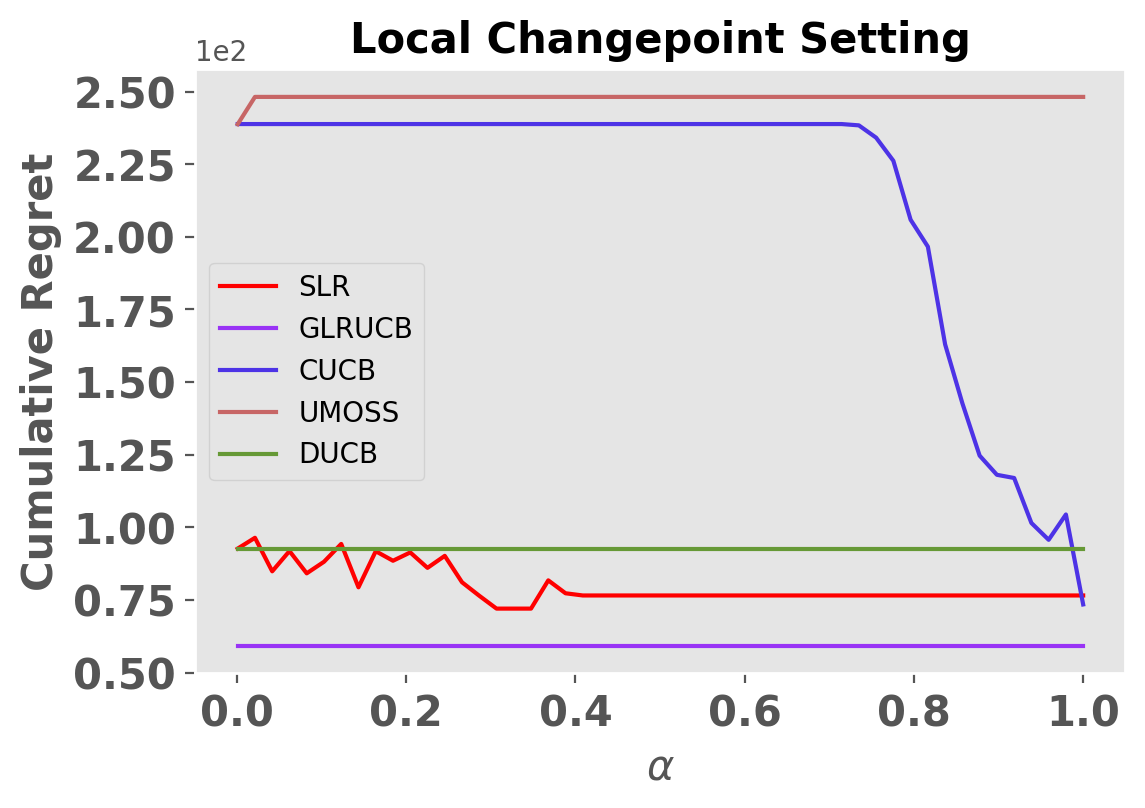

In [ ]:
#print(list_regret)

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(dpi=200)
k = 1.0

regret_slr = np.max(np.mean(list_regret_slr, axis = 1), axis = 1)
regret_glrucb = np.max(np.mean(list_regret_glrucb, axis = 1), axis = 1)
regret_cucb = np.max(np.mean(list_regret_cucb, axis = 1), axis = 1)
regret_umoss = np.max(np.mean(list_regret_umoss, axis = 1), axis = 1)
regret_ducb = np.max(np.mean(list_regret_ducb, axis = 1), axis = 1)

#regret_slr = np.max(list_regret_slr, axis = 1)
#print(regret)

plt.plot(alpha_list, regret_slr, label = "SLR", color = "r")
plt.plot(alpha_list, regret_glrucb, label = "GLRUCB", color = (0.6,0.2,0.96))
plt.plot(alpha_list, regret_cucb, label = "CUCB", color = (0.3,0.2,0.9))
plt.plot(alpha_list, regret_umoss, label = "UMOSS", color = (0.78,0.4,0.4))
plt.plot(alpha_list, regret_ducb, label = "DUCB", color = (0.4,0.6,0.21))

#plt.fill_between(range(env.T), np.average(slr.error, axis=0) + k*np.std(slr.error, axis=0), np.average(slr.error, axis=0) - k*np.std(slr.error, axis=0), alpha=0.4, edgecolor=(0.9,0.2,0.56), facecolor=(0.9,0.2,0.56), linewidth=2, linestyle='dashdot', antialiased=True)


plt.title('Local Changepoint Setting', size = 15, fontweight='bold')
plt.ylabel('Cumulative Regret', size = 15, fontweight='bold')
plt.xlabel('$\\alpha$', size = 15, fontweight='bold')
    
plt.yticks(size = 15, fontweight='bold')
plt.xticks(size = 15, fontweight='bold')

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))


#plt.xlim(env.K)
plt.grid()
plt.legend()
# plt.ylim(0,2e2)


plt.show()
